importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the data

In [ ]:
df = pd.ExcelFile("cust_data.xlsx").parse("in")

undersatanding the data

In [ ]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df.shape

(30000, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

distribution of orders column

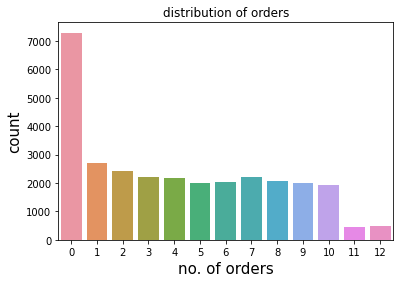

In [ ]:

sns.countplot(data=df,x='Orders')
plt.title('distribution of orders')
plt.xlabel('no. of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

Distribution of the gender of the customers

Text(0, 0.5, 'count')

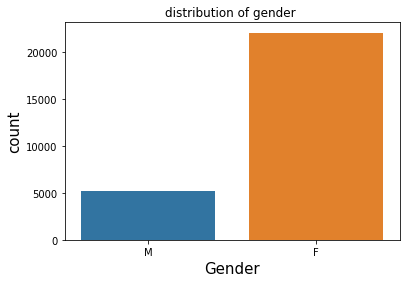

In [ ]:
sns.countplot(data=df,x='Gender')
plt.title('distribution of gender ')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)

statistical summary

In [ ]:
df["Orders"].describe() # average number of orders is 4 per customer

count    30000.000000
mean         4.169800
std          3.590311
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max         12.000000
Name: Orders, dtype: float64

In [ ]:
df["Gender"].describe() #majority of the customers in this data base are females

count     27276
unique        2
top           F
freq      22054
Name: Gender, dtype: object

missing data 

In [ ]:
df.isnull().sum() #we have misssing data in gender column

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
df.Gender.value_counts() #since mode is female we will fill missing data with mode

F    22054
M     5222
Name: Gender, dtype: int64

In [ ]:
df.Gender= df.Gender.fillna("F")

In [ ]:
df["Gender"] = df["Gender"].map({"M" : 0, "F" : 1}) # we are encoding the data

dropping cust_id column 

In [ ]:
df.drop("Cust_ID",axis = 1,inplace = True)

understanding most searched and least searched brands

In [ ]:
x= df.columns
data=[]

In [ ]:
for i in x:
  data.append({i:df[i].sum()})


In [ ]:
data

[{'Gender': 24778},
 {'Orders': 125094},
 {'Jordan': 8023},
 {'Gatorade': 7570},
 {'Samsung': 6688},
 {'Asus': 4840},
 {'Udis': 4306},
 {'Mondelez International': 4193},
 {'Wrangler': 3208},
 {'Vans': 3343},
 {'Fila': 2828},
 {'Brooks': 4204},
 {'H&M': 9846},
 {'Dairy Queen': 6280},
 {'Fendi': 4244},
 {'Hewlett Packard': 4833},
 {'Pladis': 3183},
 {'Asics': 9007},
 {'Siemens': 1442},
 {'J.M. Smucker': 22644},
 {'Pop Chips': 7437},
 {'Juniper': 14125},
 {'Huawei': 7740},
 {'Compaq': 3563},
 {'IBM': 959},
 {'Burberry': 12841},
 {'Mi': 3640},
 {'LG': 3076},
 {'Dior': 8134},
 {'Scabal': 11102},
 {'Tommy Hilfiger': 4769},
 {'Hollister': 2330},
 {'Forever 21': 1720},
 {'Colavita': 5766},
 {'Microsoft': 3491},
 {'Jiffy mix': 2641},
 {'Kraft': 2127}]

In [ ]:
d={
 

 'Jordan': 8023,
 'Gatorade': 7570,
 'Samsung': 6688,
 'Asus': 4840,
 'Udis': 4306,
 'Mondelez International': 4193,
 'Wrangler': 3208,
 'Vans': 3343,
 'Fila': 2828,
 'Brooks': 4204,
 'H&M': 9846,
 'Dairy Queen': 6280,
 
 'Fendi': 4244,
 'Hewlett Packard': 4833,
 'Pladis': 3183,
 'Asics': 9007,
 'Siemens': 1442,
 'J.M. Smucker': 22644,
 'Pop Chips': 7437,
 'Juniper': 14125,
 'Huawei': 7740,
 'Compaq': 3563,
 'IBM': 959,
 'Burberry': 12841,
 'Mi': 3640,
 'LG': 3076,
 'Dior': 8134,
 'Scabal': 11102,
 'Tommy Hilfiger': 4769,
 'Hollister': 2330,
 'Forever 21': 1720,
 'Colavita': 5766,
 'Microsoft': 3491,
 'Jiffy mix': 2641,
 'Kraft': 2127}


In [ ]:
a = pd.DataFrame(d.items(), columns=['brand', 'orders'])

In [ ]:
a

,brand,orders
0,Jordan,8023
1,Gatorade,7570
2,Samsung,6688
3,Asus,4840
4,Udis,4306
5,Mondelez International,4193
6,Wrangler,3208
7,Vans,3343
8,Fila,2828
9,Brooks,4204


In [ ]:
top = a.sort_values(by=["orders"],ascending = False)
top5 = top[:5]
top5


,brand,orders
17,J.M. Smucker,22644
19,Juniper,14125
23,Burberry,12841
27,Scabal,11102
10,H&M,9846


<BarContainer object of 5 artists>

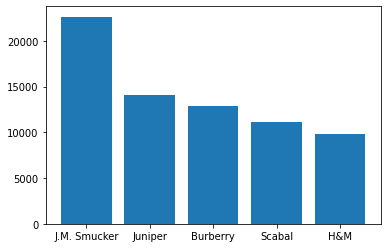

In [ ]:
plt.bar(top5.brand,top5.orders)

In [ ]:
lowest = a.sort_values(by=["orders"])
lowest5 = lowest[:5]
lowest5

,brand,orders
22,IBM,959
16,Siemens,1442
30,Forever 21,1720
34,Kraft,2127
29,Hollister,2330


<BarContainer object of 5 artists>

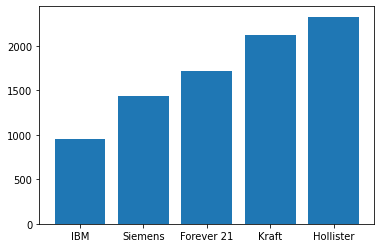

In [ ]:
plt.bar(lowest5.brand,lowest5.orders)

k means clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [ ]:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2) # applying k = 2
km.fit(X_std) 

KMeans(n_clusters=2)

In [ ]:
centroids = km.cluster_centers_ # final centroid points
centroids

array([[ 0.24007323,  0.07277915,  0.55865614,  0.50516849,  0.28016244,
         0.28494851,  0.33318124,  0.33731565,  0.38974876,  0.279736  ,
         0.13564305,  0.55679063,  0.81430405,  0.76729917,  0.49999759,
         0.26529117,  1.03856093,  0.37320346,  0.08063639,  0.72154049,
         0.73855804,  0.46375587,  0.47169553,  0.27429447,  0.09624438,
         1.426795  ,  0.48934094,  0.7276099 ,  0.81920685,  0.6822416 ,
         0.9546795 ,  0.64462825,  0.66757104,  0.67373658,  0.51750126,
         0.74785921,  0.7349849 ],
       [-0.03064534, -0.00929026, -0.07131244, -0.06448475, -0.03576273,
        -0.03637367, -0.04253058, -0.04305833, -0.04975142, -0.03570829,
        -0.01731483, -0.07107431, -0.10394589, -0.09794572, -0.06382468,
        -0.03386441, -0.13257228, -0.04763941, -0.01029323, -0.09210463,
        -0.09427692, -0.05919843, -0.06021192, -0.03501368, -0.01228559,
        -0.18213035, -0.06246436, -0.09287939, -0.10457174, -0.08708812,
        -0.12186

In [ ]:
km.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
km.inertia_

1058328.394424151

determining k with elbow plot

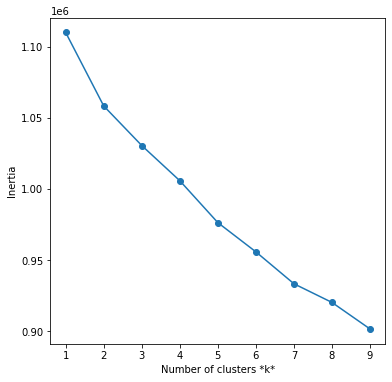

In [ ]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

best k value is 4 , so best model is with 4 clusters





In [ ]:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) # applying k = 2
km.fit(X_std) 



KMeans(n_clusters=4)

In [ ]:
data_output = df.copy(deep = True)

In [ ]:
data_output['cluster']=km.labels_

In [ ]:
data_output

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,3
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
29996,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
29997,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# check the size of each cluster
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([19284,  4469,  1169,  5078]))

Text(2.85, 2000, '5078')

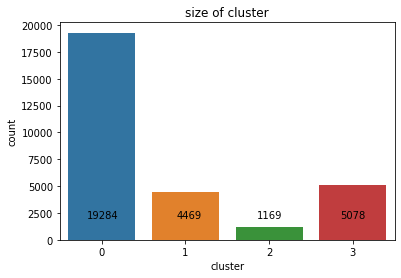

In [ ]:
sns.countplot(data=data_output,x='cluster')
plt.title('size of cluster')
plt.text(x=-.18,y=2000,s=np.unique(km.labels_,return_counts=True)[1][0])
plt.text(x=.9,y=2000,s=np.unique(km.labels_,return_counts=True)[1][1])
plt.text(x=1.85,y=2000,s=np.unique(km.labels_,return_counts=True)[1][2])
plt.text(x=2.85,y=2000,s=np.unique(km.labels_,return_counts=True)[1][3])